In [1]:
%%bash 
which python

/global/project/projectdirs/atlas/xju/miniconda3/envs/py3.6/bin/python


In [2]:
import sys
sys.path.append('..')
from nx_graph.utils_test import create_trained_model
from nx_graph.utils_test import plot_metrics

In [5]:
config_file = '../configs/nxgraph_default.yaml'
input_ckpt = '../trained_results/nxgraph_small_decoder_001/bak'
model = create_trained_model(config_file, input_ckpt)

In [3]:
iteration = 8790

In [6]:
odd, tdd = model(iteration)

INFO:tensorflow:Restoring parameters from ../trained_results/nxgraph_small_decoder_001/bak/checkpoint_08790.ckpt


Accuracy:  0.9663
Precision: 0.9424
Recall:    0.9172


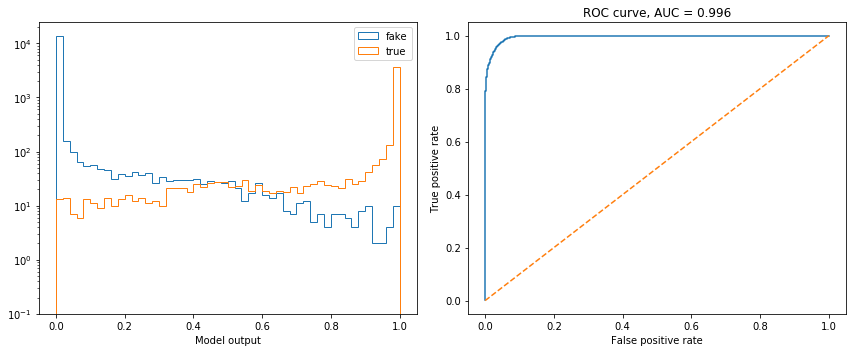

In [7]:
plot_metrics(odd, tdd, odd_th=0.5)

INFO:tensorflow:Restoring parameters from ../trained_results/nxgraph_small_decoder_001/bak/checkpoint_24869.ckpt
Accuracy:  0.9771
Precision: 0.9583
Recall:    0.9605


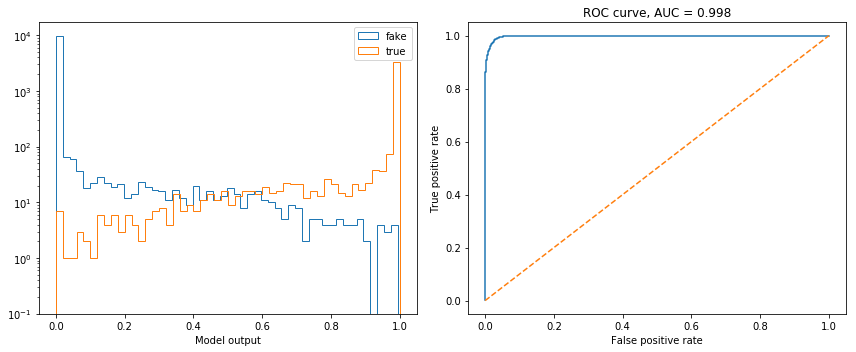

In [12]:
iteration = 24869
odd, tdd = model(iteration)
plot_metrics(odd, tdd, odd_th=0.5)

INFO:tensorflow:Restoring parameters from ../trained_results/nxgraph_small_decoder_001/bak/checkpoint_20246.ckpt
Accuracy:  0.9587
Precision: 0.8964
Recall:    0.9157


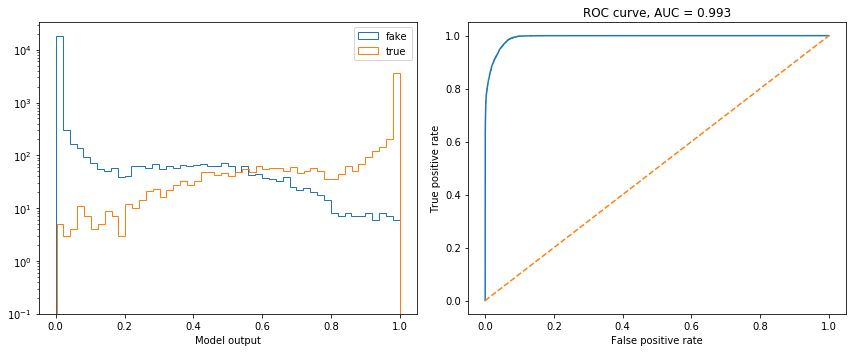

In [10]:
iteration = 20246
odd, tdd = model(iteration)
plot_metrics(odd, tdd, odd_th=0.5)